In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import style
%matplotlib inline
import datetime
import seaborn 
import datetime as dt
from scipy.stats import boxcox

In [2]:
rcParams['figure.figsize']=10,6

In [3]:
df_gold = pandas.read_csv('data/Gold.csv', index_col=0, parse_dates=True)
df_gold = df_gold.rename(columns={'Price': 'Gold'})
df_gold.head()

,Gold,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-11-18,"1,471.90","1,467.80","1,474.40","1,456.60",331.24K,0.23%
2019-11-15,"1,468.50","1,471.90","1,472.10","1,462.80",251.21K,-0.33%
2019-11-14,"1,473.40","1,464.00","1,475.50","1,461.70",317.40K,0.69%
2019-11-13,"1,463.30","1,456.50","1,467.90","1,456.40",352.33K,0.66%
2019-11-12,"1,453.70","1,455.90","1,461.30","1,446.20",429.61K,-0.23%


In [4]:
df_silver = pandas.read_csv('data/Silver.csv', index_col=0, parse_dates=True)
df_silver = df_silver.rename(columns={'Price': 'Silver'})
df_silver.head()

,Silver,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-11-18,17.000,16.950,17.030,16.705,94.06K,0.31%
2019-11-15,16.948,17.000,17.010,16.780,66.80K,-0.47%
2019-11-14,17.028,16.930,17.080,16.845,79.01K,0.68%
2019-11-13,16.913,16.720,17.000,16.720,99.84K,1.32%
2019-11-12,16.692,16.785,16.875,16.615,93.98K,-0.65%


In [5]:
df_USD = pandas.read_csv("data/USD_Index.csv", parse_dates = True, index_col=0)
df_USD = df_USD.rename(columns={'Price': 'USD'})
df_USD.head()

,USD,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-07-05,96.435,95.975,96.505,95.975,0.31K,0.58%
2019-07-04,95.876,95.835,95.925,95.835,0.03K,0.00%
2019-07-03,95.876,95.845,95.900,95.785,0.38K,0.04%
2019-07-02,95.839,96.005,96.005,95.745,0.14K,-0.14%
2019-07-01,95.976,95.430,95.980,95.430,0.30K,0.75%


In [6]:
df_oil = pandas.read_csv('data/Crude_Oil.csv', index_col=0, parse_dates=True)
df_oil = df_oil.rename(columns={'Price': 'Oil'})
df_oil.head()

,Oil,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-08-21,55.68,56.05,57.13,55.55,704.04K,-1.17%
2019-08-20,56.34,56.10,56.60,55.28,47.45K,0.23%
2019-08-19,56.21,54.96,56.41,54.84,113.57K,2.44%
2019-08-16,54.87,54.74,55.67,54.26,168.35K,0.73%
2019-08-15,54.47,54.90,55.33,53.77,527.87K,-1.38%


In [7]:
df_index = pandas.read_csv('data/S&P500.csv', index_col=0, parse_dates=True)
df_index = df_index.rename(columns={'Price': 'Index'})
df_index.head()

,Index,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-11-14,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
2019-11-13,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2019-11-12,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
2019-11-11,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
2019-11-08,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [8]:
dataset = pandas.concat([df_gold.Gold, df_silver.Silver, df_USD.USD, df_oil.Oil, df_index.Index], axis=1)
dataset.head()

,Gold,Silver,USD,Oil,Index
Date,,,,,
2000-01-03,NaN,NaN,99.89,NaN,"1,455.20"
2000-01-04,283.70,5.375,100.10,25.55,"1,399.40"
2000-01-05,282.10,5.210,100.05,24.91,"1,402.10"
2000-01-06,282.40,5.167,100.34,24.78,"1,403.50"
2000-01-07,282.90,5.195,100.50,24.22,"1,441.50"


In [9]:
dataset.isnull().sum()  # checking null values in dataset

Gold      131
Silver    131
USD       131
Oil       131
Index     131
dtype: int64

In [10]:
df = dataset.loc['2000-01-01' : ]
df.head()

,Gold,Silver,USD,Oil,Index
Date,,,,,
2000-01-03,NaN,NaN,99.89,NaN,"1,455.20"
2000-01-04,283.70,5.375,100.10,25.55,"1,399.40"
2000-01-05,282.10,5.210,100.05,24.91,"1,402.10"
2000-01-06,282.40,5.167,100.34,24.78,"1,403.50"
2000-01-07,282.90,5.195,100.50,24.22,"1,441.50"


In [11]:
df.fillna(0.0)  # filling all NaN values with 0

,Gold,Silver,USD,Oil,Index
Date,,,,,
2000-01-03,0.0,0.000,99.89,0.00,"1,455.20"
2000-01-04,283.70,5.375,100.10,25.55,"1,399.40"
2000-01-05,282.10,5.210,100.05,24.91,"1,402.10"
2000-01-06,282.40,5.167,100.34,24.78,"1,403.50"
2000-01-07,282.90,5.195,100.50,24.22,"1,441.50"
...,...,...,...,...,...
2019-11-12,"1,453.70",16.692,0.00,0.00,"3,091.84"
2019-11-13,"1,463.30",16.913,0.00,0.00,"3,094.04"
2019-11-14,"1,473.40",17.028,0.00,0.00,"3,096.63"


In [12]:
df.describe()  # statistics

,Silver,USD,Oil
count,5000.000000,5000.000000,5000.000000
mean,14.969839,90.428069,62.010338
std,8.558769,11.674156,26.337905
min,4.028000,71.304000,17.450000
25%,7.043000,80.915000,40.692500
50%,14.980000,88.290000,59.030000
75%,18.162000,96.686250,83.080000
max,48.599000,121.210000,145.290000


### Exploring Rolling Mean and Return Rate of Gold Stock

I will include the most popular technical indicator moving average and exponential moving average here. The Moving Average makes the line smooth and display the increasing or decreasing trend in price.

In [13]:
mp = {'K':' * 10**3', 'M':' * 10**6'}
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return float(x.replace(',', ''))

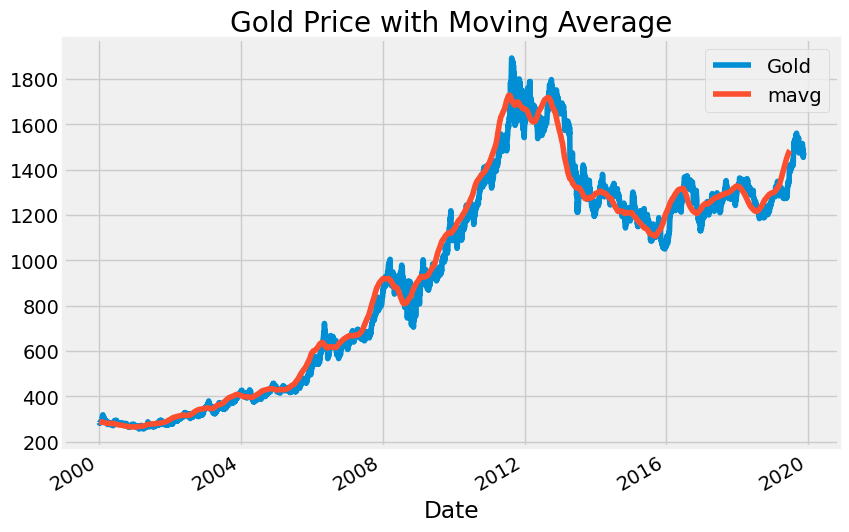

In [15]:
df_gold['Gold'] = df_gold['Gold'].apply(value_to_float)
price = df_gold['Gold']

mavg = price.rolling(window=100).mean()
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

# plotting
price.plot(label='Gold')
mavg.plot(label='mavg')
plt.title('Gold Price with Moving Average')
plt.legend()

In [19]:
for col in df.columns:
    df[col] = df[col].apply(value_to_float)

Text(0.5, 1.0, 'Gold Return Rate')

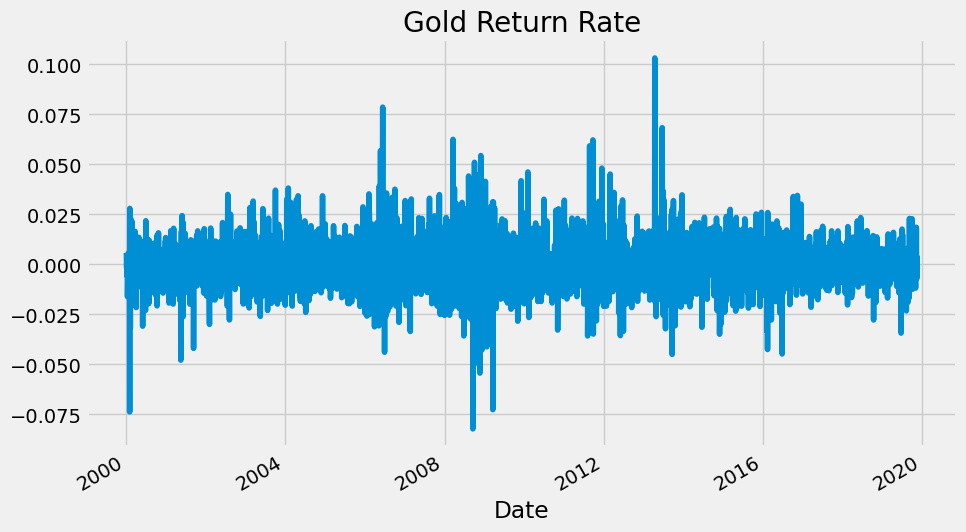

In [20]:
#Based on the formula, plotting the returns
rets = price / price.shift(1) - 1

from matplotlib import style
plt.figure(figsize=(10,6))
rets.plot(label='return')
plt.title('Gold Return Rate')

<Figure size 1000x600 with 0 Axes>

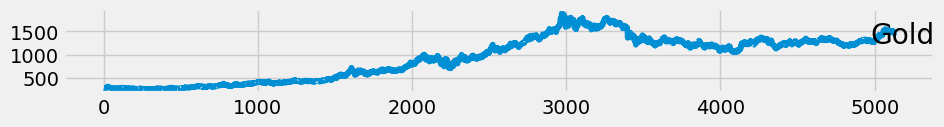

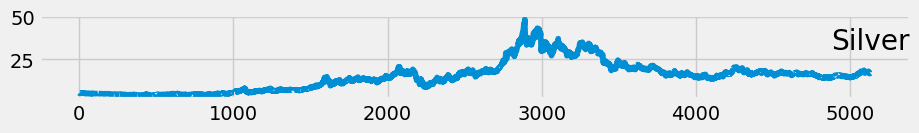

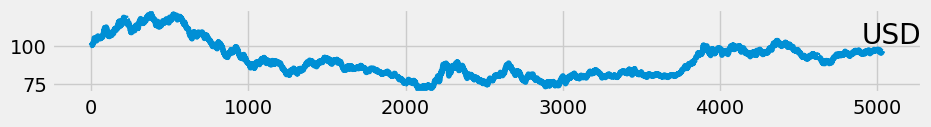

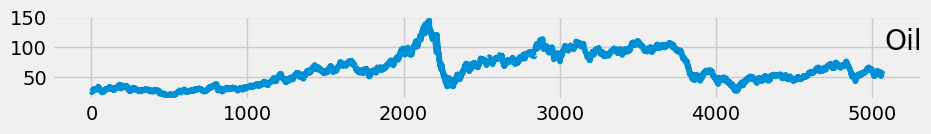

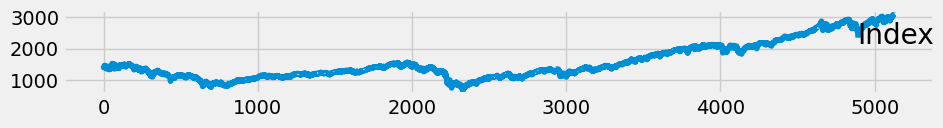

In [21]:
values = df.values

# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
plt.figure(figsize=(10,6))
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
    plt.show()

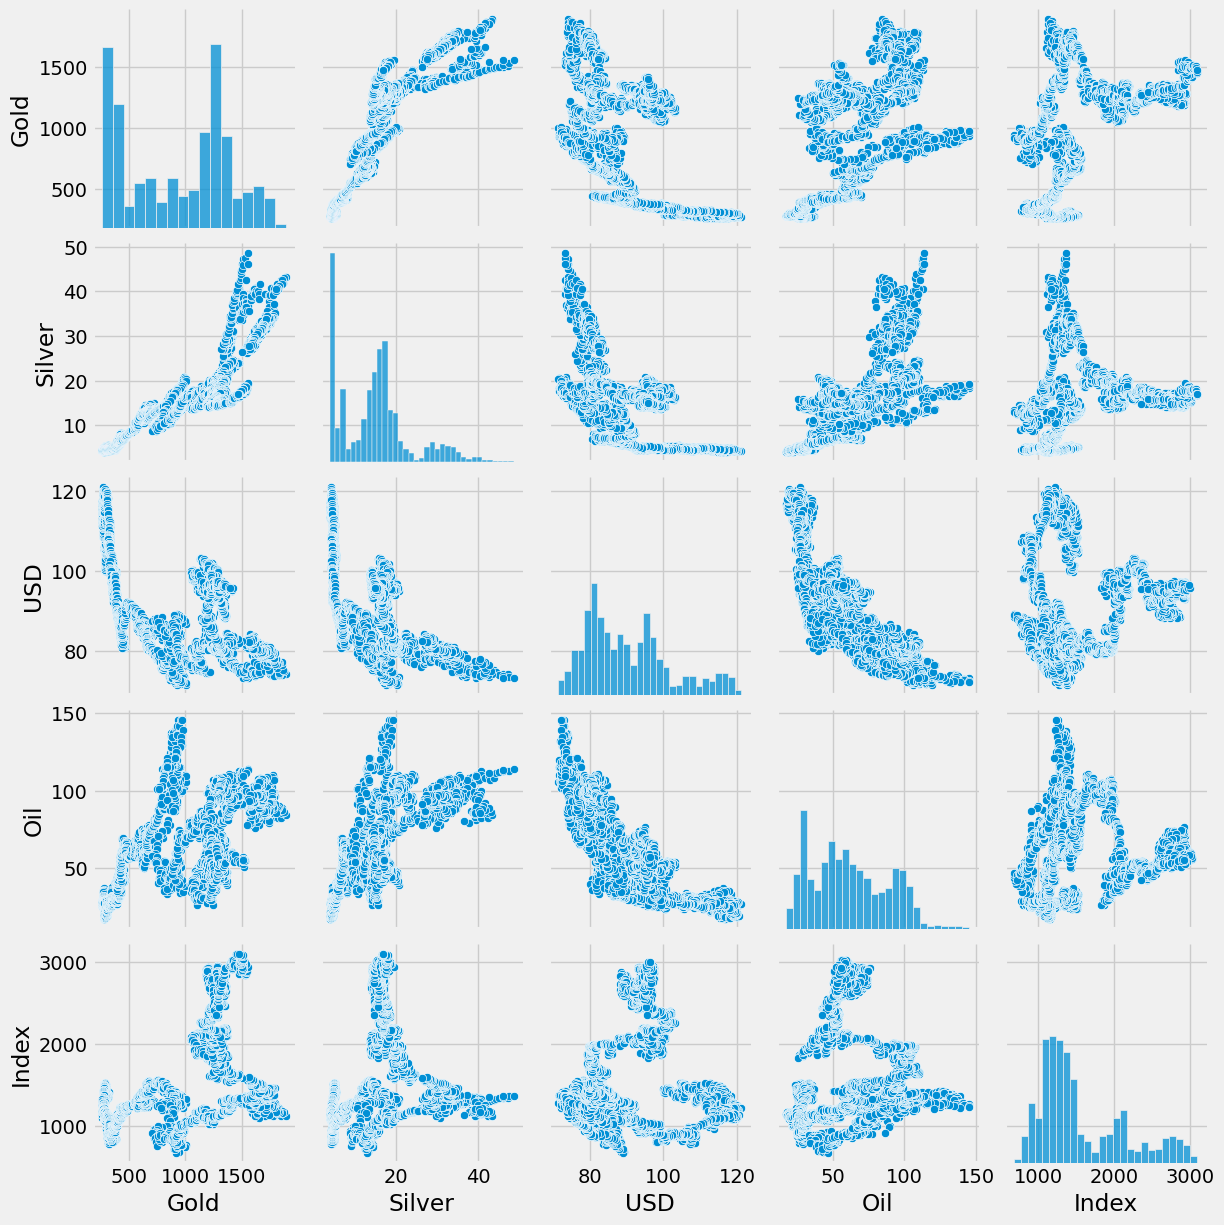

In [22]:
seaborn.pairplot(df)  # plot on original data

### Correlation Analysis to check if any of the variables affect others

This analysis was done using % change to find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help to see whether the returns are affected by other stocks’ returns

In [23]:
rets = df.pct_change()
corr = rets.corr(method='pearson')
corr

,Gold,Silver,USD,Oil,Index
Gold,1.000000,0.778070,-0.394858,0.207061,-0.031048
Silver,0.778070,1.000000,-0.367355,0.248045,0.081869
USD,-0.394858,-0.367355,1.000000,-0.199480,-0.070779
Oil,0.207061,0.248045,-0.199480,1.000000,0.206668
Index,-0.031048,0.081869,-0.070779,0.206668,1.000000


Text(0, 0.5, 'Returns Oil')

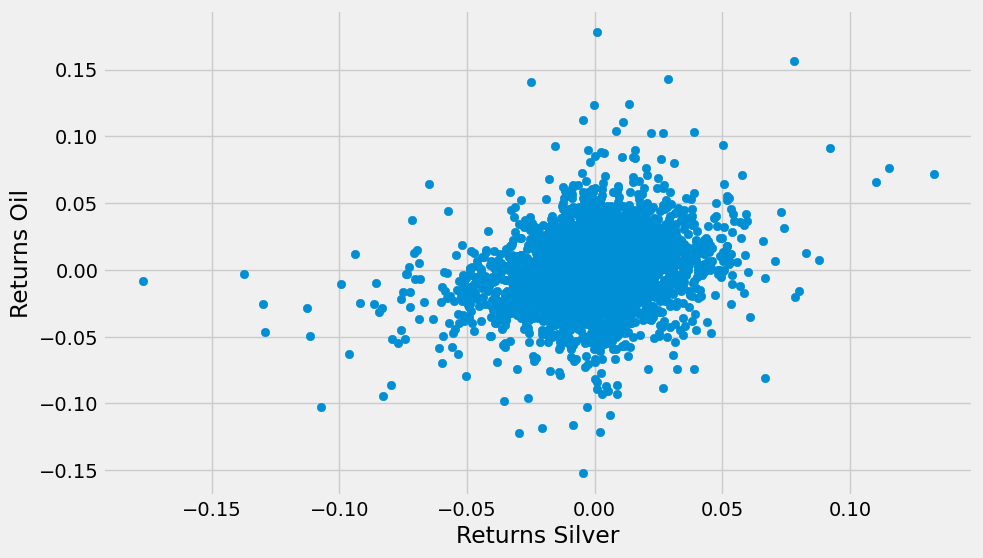

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(rets.Silver, rets.Oil)
plt.xlabel('Returns Silver')
plt.ylabel('Returns Oil')

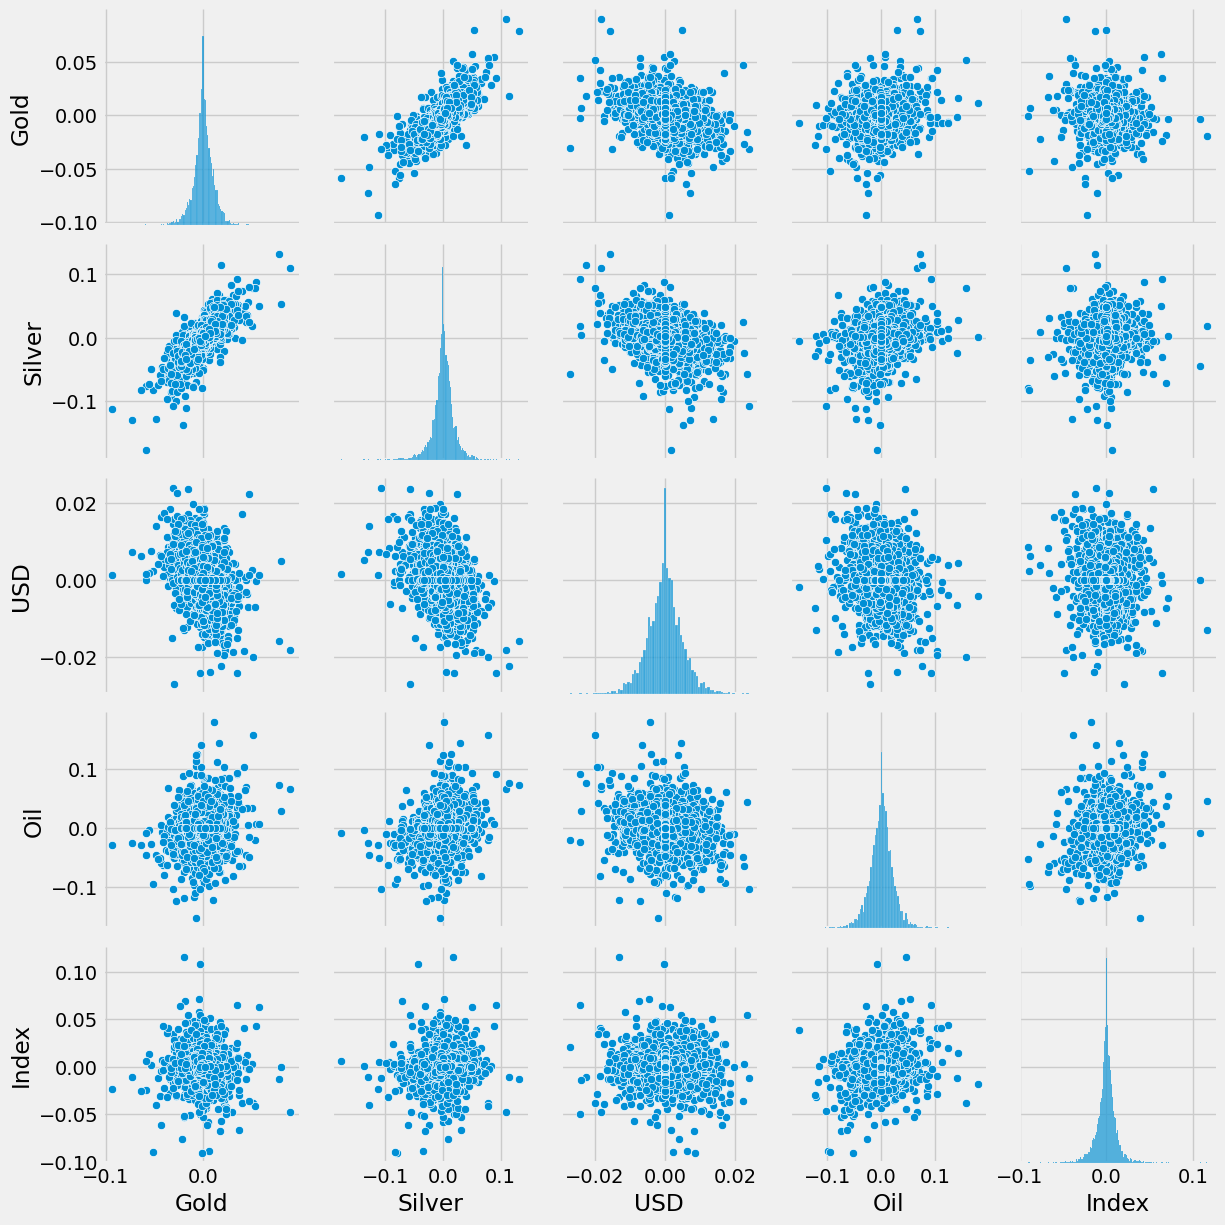

In [25]:
seaborn.pairplot(rets) 

Heatmap below visualizes correlation, with lighter colors being more correlated.

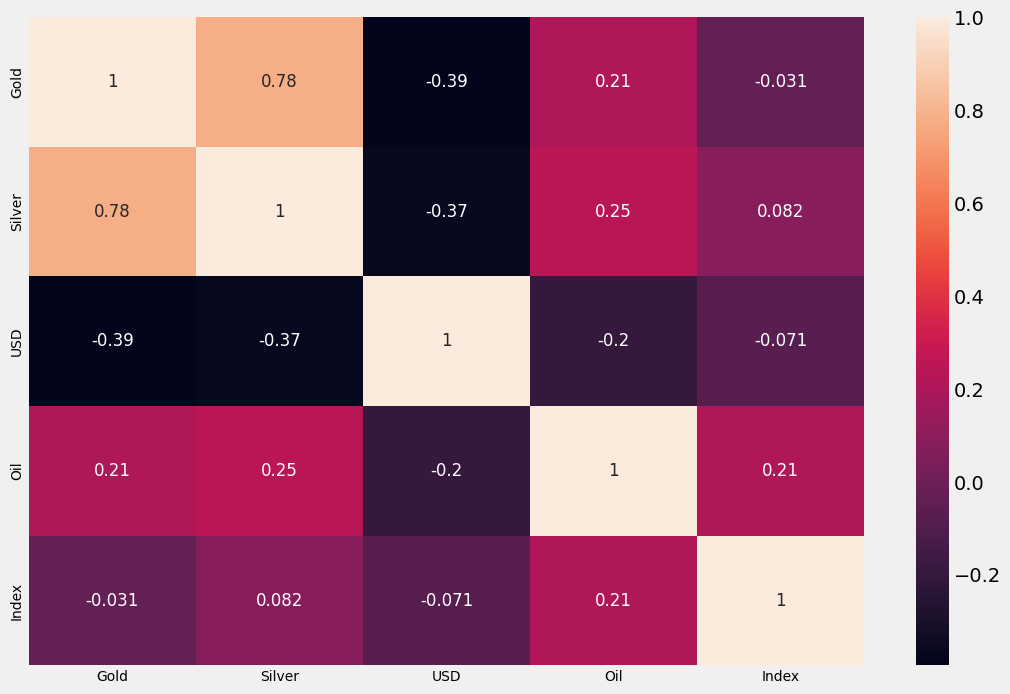

In [26]:
seaborn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()